<a href="https://colab.research.google.com/github/JainrajM/Flask/blob/main/Flask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = data = pd.read_excel("/content/iris  (1).xls")
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
print(df.info())
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


,SL,SW,PL,PW,Classification
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [27]:
df.Classification = df.Classification.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   SL              150 non-null    float64 
 1   SW              150 non-null    float64 
 2   PL              150 non-null    float64 
 3   PW              150 non-null    float64 
 4   Classification  150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [13]:
df.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

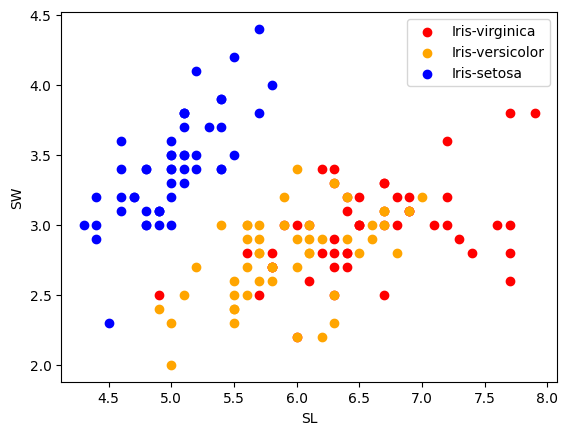

In [28]:
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
for i in range(3):
    x = df[df['Classification'] == species[i]]
    plt.scatter(x['SL'], x['SW'], c = colors[i], label=species[i])
plt.xlabel("SL")
plt.ylabel("SW")
plt.legend()

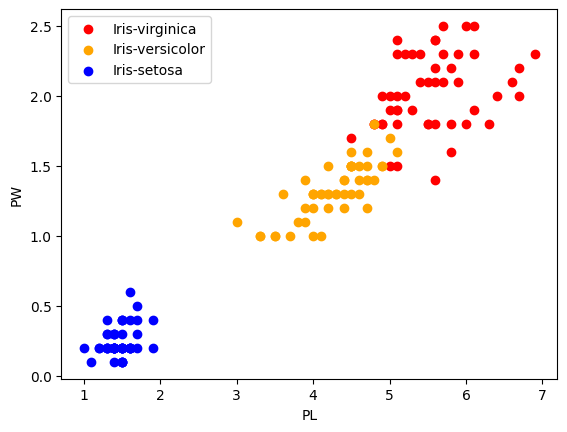

In [42]:
for i in range(3):

    x = df[df['Classification'] == species[i]]
    plt.scatter(x['PL'], x['PW'], c = colors[i], label=species[i])
plt.xlabel("PL")
plt.ylabel("PW")
plt.legend()

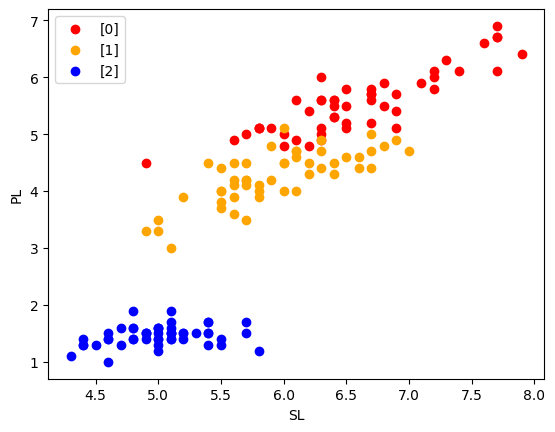

In [45]:
for i in range(3):

    x = df[df['Classification'] == species[i]]
    plt.scatter(x['SL'], x['PL'], c = colors[i], label=[i])
plt.xlabel("SL")
plt.ylabel("PL")
plt.legend()

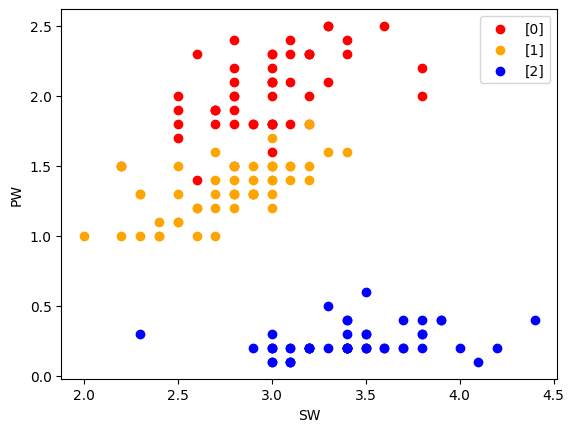

In [46]:
for i in range(3):

    x = df[df['Classification'] == species[i]]
    plt.scatter(x['SW'], x['PW'], c = colors[i], label=[i])
plt.xlabel("SW")
plt.ylabel("PW")
plt.legend()

In [30]:
df.corr()

,SL,SW,PL,PW
SL,1.000000,-0.109369,0.871754,0.817954
SW,-0.109369,1.000000,-0.420516,-0.356544
PL,0.871754,-0.420516,1.000000,0.962757
PW,0.817954,-0.356544,0.962757,1.000000


<Axes: >

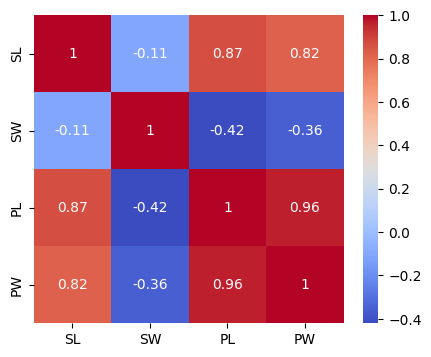

In [31]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [33]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['Classification'])
Y = df['Classification']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [35]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [36]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [37]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [38]:
import pickle
file = 'savemodel.sav'
pickle.dump(model,open(file,'wb'))

In [39]:
load_model = pickle.load(open(file,'rb'))

In [40]:
#trying to predict something
  #to check the parameters we are having
x_test.head()


,SL,SW,PL,PW
123,6.3,2.7,4.9,1.8
12,4.8,3.0,1.4,0.1
33,5.5,4.2,1.4,0.2
38,4.4,3.0,1.3,0.2
32,5.2,4.1,1.5,0.1


In [41]:
load_model.predict([[6.3,2.7,4.9,1.8]])

array(['Iris-virginica'], dtype=object)